## Setup

In [1]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\Nisipeanu\Documents\Github\hair-care-ai-uni


## Install YOLO11 via Ultralytics

In [17]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [6]:
%pip install roboflow
import os
os.makedirs(os.path.join(HOME, 'datasets'), exist_ok=True)
%cd {os.path.join(HOME, 'datasets')}

from roboflow import Roboflow

ROBOFLOW_API_KEY = 'hIqrkGLaHhoE0snidq5L'
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("nisipeanu")
project = workspace.project("scalp-data-3feq3-ahmd3")
version = project.version(5)
dataset = version.download("yolov11")


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


Note: you may need to restart the kernel to use updated packages.
c:\Users\Nisipeanu\Documents\Github\hair-care-ai-uni\datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to scalp-data-5 in yolov11:: 100%|██████████| 1306/1306 [00:00<00:00, 2068.04it/s]


## Custom Training

In [23]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/scalp-data-5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

## Validate fine-tuned model

In [31]:
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/scalp-data-5/valid/labels.cache... 93 images, 22 backgrounds, 0 corrupt: 100% 93/93 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:02<00:00,  2.45it/s]
                   all         93        512      0.368      0.273      0.251      0.121
                     d         52        333      0.521      0.577       0.53       0.31
                    ds         16         52     0.0647     0.0769     0.0419     0.0247
                     o         20         80       0.29      0.188      0.158     0.0721
                     s          6         47      0.596      0.252      0.275      0.076
Speed: 3.6ms preprocess, 10.0ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at 

## Inference with custom model

In [32]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/62 /content/datasets/scalp-data-5/test/images/D_106_jpg.rf.bb8eebcffa84d005c7554094ed24d08e.jpg: 640x640 1 d, 15.7ms
image 2/62 /content/datasets/scalp-data-5/test/images/D_108_jpg.rf.2af410089238538fe81d562a856dd33c.jpg: 640x640 (no detections), 15.7ms
image 3/62 /content/datasets/scalp-data-5/test/images/D_114_jpg.rf.53ac5dfbb4d36bebd646cb96895bc2ab.jpg: 640x640 1 d, 15.6ms
image 4/62 /content/datasets/scalp-data-5/test/images/D_127_jpg.rf.6ef3055effab8bdce41edea464e24aeb.jpg: 640x640 (no detections), 15.6ms
image 5/62 /content/datasets/scalp-data-5/test/images/D_136_jpg.rf.a9d7278128123e0bf97b9b5c7249fc29.jpg: 640x640 3 ds, 1 ds, 15.6ms
image 6/62 /content/datasets/scalp-data-5/test/images/D_13_jpg.rf.ba4f0cb1d7920dde79fc8f8a2be23bda.jpg: 640x640 2 ds, 15.6ms
image 7/62 /content/datasets/scalp-data-5/test/image

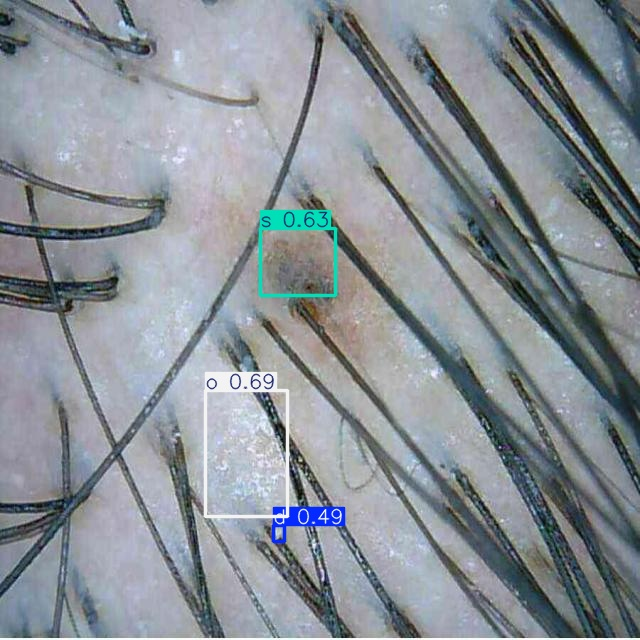

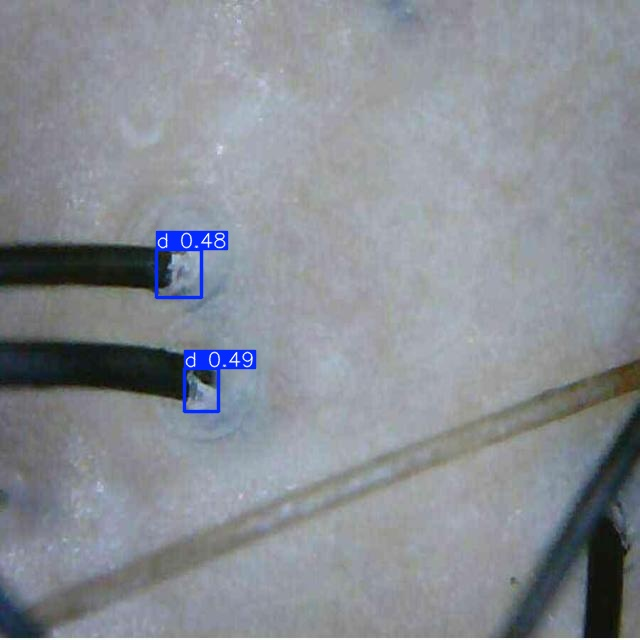

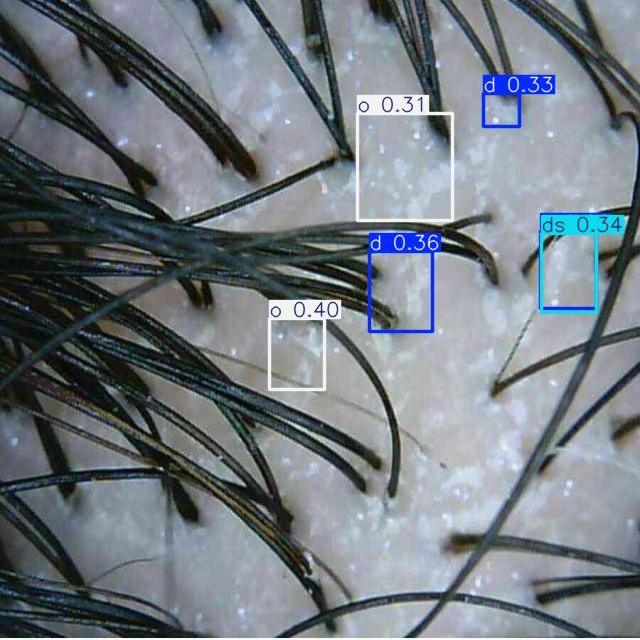

In [33]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")